<a href="https://colab.research.google.com/github/nadiataoufik/Census_income-/blob/master/ED_Census__Forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#time setries with pandas 
from datetime import datetime 
import pandas as pd


In [ ]:
df=pd.read_excel(r"C:\Users\Ntaoufi\Documents\ED_Cencus.xlsx")
df.head(30)

In [ ]:
len(df)

1000

In [ ]:
df.columns

Index(['Date', 'Hour', 'Total_Ed_Patients', 'MaxAdmitWaitTime',
       'MinMinutesToEta', 'HU_Patients', 'MinFromResGr40', 'OneToOnePatients',
       'EDHolds', 'EDLocRed', 'EDLocBlue', 'EDLocGreen', 'EDLocGold',
       'EDLocPeds', 'EDLocMinor', 'EDLocOth', 'EDStaffRN', 'EDStaffPCA',
       'EDStaffCSS', 'EDStaffTrans', 'EDStaffOther', 'Total_Adm_Patients',
       'AvgDoor2Doc', 'AvgDoor2Rm', 'Total_Ed_Patients_Bud',
       'Total_Ed_Nurse_Bud', 'Total_Ed_PCA_Bud', 'Max_WR_Time',
       'AvgConv2BedAssign', 'Nurse_Ratio_Bud', 'PCA_Ratio_Bud', 'AdmBedReq',
       'Minute', 'ArrivedLast30Minutes'],
      dtype='object')

In [ ]:
df=df.drop(['MaxAdmitWaitTime',
       'MinMinutesToEta', 'HU_Patients', 'MinFromResGr40', 'OneToOnePatients',
       'EDHolds', 'EDLocRed', 'EDLocBlue', 'EDLocGreen', 'EDLocGold',
       'EDLocPeds', 'EDLocMinor', 'EDLocOth', 'EDStaffRN', 'EDStaffPCA',
       'EDStaffCSS', 'EDStaffTrans', 'EDStaffOther', 'Total_Adm_Patients',
       'AvgDoor2Doc', 'AvgDoor2Rm', 'Total_Ed_Patients_Bud',
       'Total_Ed_Nurse_Bud', 'Total_Ed_PCA_Bud', 'Max_WR_Time',
       'AvgConv2BedAssign', 'Nurse_Ratio_Bud', 'PCA_Ratio_Bud', 'AdmBedReq', 'ArrivedLast30Minutes'],axis=1)

In [ ]:
df.head(30)

In [ ]:
df=df.dropna()
df.head()

,Date,Hour,Total_Ed_Patients,Minute
0,2018-06-08,15,44,0
1,2018-06-08,16,50,0
2,2018-06-08,17,54,0
3,2018-06-08,18,58,0
4,2018-06-08,19,64,0


In [ ]:
df["day"] = df['Date'].map(lambda x: x.day)
df["month"] = df['Date'].map(lambda x: x.month)
df["year"] = df['Date'].map(lambda x: x.year)


In [ ]:
df=df.drop('Date',axis=1)
df.head()

,Hour,Total_Ed_Patients,Minute,day,month,year
0,15,44,0,8,6,2018
1,16,50,0,8,6,2018
2,17,54,0,8,6,2018
3,18,58,0,8,6,2018
4,19,64,0,8,6,2018


In [ ]:
df['Date']=pd.to_datetime({'year':df['year'],'month':df['month'],'day':df['day'],'Hour':df['Hour'],'Minute':df['Minute']})

In [ ]:
df.head()

,Hour,Total_Ed_Patients,Minute,day,month,year,Date
0,15,44,0,8,6,2018,2018-06-08 15:00:00
1,16,50,0,8,6,2018,2018-06-08 16:00:00
2,17,54,0,8,6,2018,2018-06-08 17:00:00
3,18,58,0,8,6,2018,2018-06-08 18:00:00
4,19,64,0,8,6,2018,2018-06-08 19:00:00


In [ ]:
df= df.set_index('Date')
df.head()

,Hour,Total_Ed_Patients,Minute,day,month,year
Date,,,,,,
2018-06-08 15:00:00,15,44,0,8,6,2018
2018-06-08 16:00:00,16,50,0,8,6,2018
2018-06-08 17:00:00,17,54,0,8,6,2018
2018-06-08 18:00:00,18,58,0,8,6,2018
2018-06-08 19:00:00,19,64,0,8,6,2018


In [ ]:
df=df.asfreq('H')

In [ ]:
df.index

DatetimeIndex(['2018-06-08 15:00:00', '2018-06-08 16:00:00',
               '2018-06-08 17:00:00', '2018-06-08 18:00:00',
               '2018-06-08 19:00:00', '2018-06-08 20:00:00',
               '2018-06-08 21:00:00', '2018-06-08 22:00:00',
               '2018-06-08 23:00:00', '2018-06-09 00:00:00',
               ...
               '2018-07-20 00:00:00', '2018-07-20 01:00:00',
               '2018-07-20 02:00:00', '2018-07-20 03:00:00',
               '2018-07-20 04:00:00', '2018-07-20 05:00:00',
               '2018-07-20 06:00:00', '2018-07-20 07:00:00',
               '2018-07-20 08:00:00', '2018-07-20 09:00:00'],
              dtype='datetime64[ns]', name='Date', length=1003, freq='H')

<AxesSubplot:xlabel='Date'>

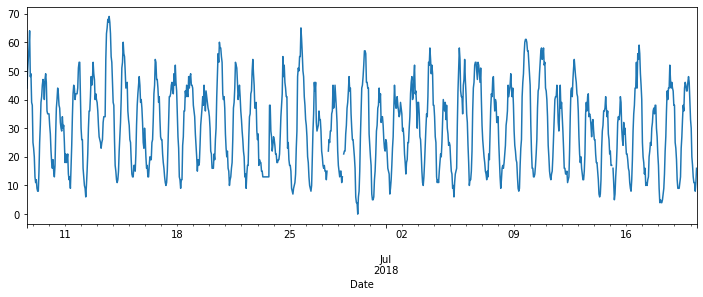

In [ ]:
df['Total_Ed_Patients'].plot(figsize=(12,4))

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
df['Total_Ed_Patients'].isnull().sum()

3

In [ ]:
df=df.head(200)

In [ ]:
len(df)

200

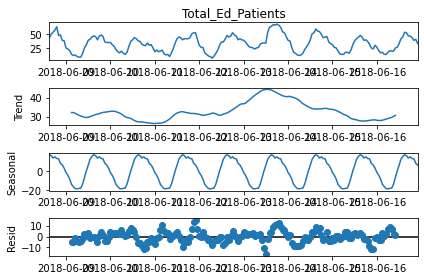

In [ ]:
result=seasonal_decompose(df['Total_Ed_Patients'],model='add')
result.plot();

In [ ]:
#test the stationarity 
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [ ]:
adf_test(df['Total_Ed_Patients'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -6.515340e+00
p-value                 1.074842e-08
# lags used             8.000000e+00
# observations          1.910000e+02
critical value (1%)    -3.465059e+00
critical value (5%)    -2.876794e+00
critical value (10%)   -2.574901e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [ ]:
pip install pmdarima

In [ ]:
from pmdarima import auto_arima

In [ ]:
#without seasonality 
model1=auto_arima(df['Total_Ed_Patients'],start_p=0,start_q=0,max_p=6,max_q=3,seasonal=False,trace=False)
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  177
Model:               SARIMAX(2, 0, 1)   Log Likelihood                -508.254
Date:                Mon, 13 Sep 2021   AIC                           1026.508
Time:                        12:28:52   BIC                           1042.389
Sample:                             0   HQIC                          1032.949
                                - 177                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.1600      0.357      6.043      0.000       1.459       2.861
ar.L1          1.8551      0.040     46.252      0.000       1.776       1.934
ar.L2         -0.9203      0.037    -24.830      0.000      -0.993      -0.848
ma.L1         -0.7357      0.077     -9.579      0.000      -0.886      -0.585
sigma2        17.9388      1.424     12.594      0.000      15.147      20.731
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                27.74
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.96   Skew:                             0.14
Prob(H) (two-sided):                  0.87   Kurtosis:                         4.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:

df = df[:-22]

In [ ]:
len(df)

177

In [ ]:
df.tail(24)

,Hour,Total_Ed_Patients,Minute,day,month,year
Date,,,,,,
2018-06-15 00:00:00,0.0,31.0,0.0,15.0,6.0,2018.0
2018-06-15 01:00:00,1.0,26.0,0.0,15.0,6.0,2018.0
2018-06-15 02:00:00,2.0,25.0,0.0,15.0,6.0,2018.0
2018-06-15 03:00:00,3.0,19.0,0.0,15.0,6.0,2018.0
2018-06-15 04:00:00,4.0,14.0,0.0,15.0,6.0,2018.0
2018-06-15 05:00:00,5.0,13.0,0.0,15.0,6.0,2018.0
2018-06-15 06:00:00,6.0,13.0,0.0,15.0,6.0,2018.0
2018-06-15 07:00:00,7.0,17.0,0.0,15.0,6.0,2018.0
2018-06-15 08:00:00,8.0,17.0,0.0,15.0,6.0,2018.0


In [ ]:
177-24

153

In [ ]:
train=df[:153]
test=df[153:]

In [ ]:
test

,Hour,Total_Ed_Patients,Minute,day,month,year
Date,,,,,,
2018-06-15 00:00:00,0.0,31.0,0.0,15.0,6.0,2018.0
2018-06-15 01:00:00,1.0,26.0,0.0,15.0,6.0,2018.0
2018-06-15 02:00:00,2.0,25.0,0.0,15.0,6.0,2018.0
2018-06-15 03:00:00,3.0,19.0,0.0,15.0,6.0,2018.0
2018-06-15 04:00:00,4.0,14.0,0.0,15.0,6.0,2018.0
2018-06-15 05:00:00,5.0,13.0,0.0,15.0,6.0,2018.0
2018-06-15 06:00:00,6.0,13.0,0.0,15.0,6.0,2018.0
2018-06-15 07:00:00,7.0,17.0,0.0,15.0,6.0,2018.0
2018-06-15 08:00:00,8.0,17.0,0.0,15.0,6.0,2018.0


In [ ]:
from statsmodels.tsa.arima_model import ARIMA,ARIMAResults

In [ ]:
model=ARIMA(train['Total_Ed_Patients'],order=(2, 0, 1))
result=model.fit()
result.summary()

C:\Users\Ntaoufi\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:      Total_Ed_Patients   No. Observations:                  153
Model:                     ARMA(2, 1)   Log Likelihood                -443.200
Method:                       css-mle   S.D. of innovations              4.337
Date:                Mon, 13 Sep 2021   AIC                            896.401
Time:                        12:31:56   BIC                            911.553
Sample:                    06-08-2018   HQIC                           902.556
                         - 06-14-2018                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      33.3979      1.475     22.636      0.000      30.506      36.290
ar.L1.Total_Ed_Patients     1.8583      0.035     52.735      0.000       1.789       1.927
ar.L2.Total_Ed_Patients    -0.9221      0.033    -27.702      0.000      -0.987      -0.857
ma.L1.Total_Ed_Patients    -0.7364      0.060    -12.210      0.000      -0.855      -0.618
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0076           -0.2630j            1.0414           -0.0406
AR.2            1.0076           +0.2630j            1.0414            0.0406
MA.1            1.3580           +0.0000j            1.3580            0.0000
-----------------------------------------------------------------------------
"""

In [ ]:
start=len(train)
end=len(train)+len(test)-1

In [ ]:
predictions=result.predict(start,end,typ='levels').rename('prediction using ARIMA')

In [ ]:
test['Total_Ed_Patients']

Date
2018-06-15 00:00:00    31.0
2018-06-15 01:00:00    26.0
2018-06-15 02:00:00    25.0
2018-06-15 03:00:00    19.0
2018-06-15 04:00:00    14.0
2018-06-15 05:00:00    13.0
2018-06-15 06:00:00    13.0
2018-06-15 07:00:00    17.0
2018-06-15 08:00:00    17.0
2018-06-15 09:00:00    15.0
2018-06-15 10:00:00    21.0
2018-06-15 11:00:00    31.0
2018-06-15 12:00:00    38.0
2018-06-15 13:00:00    42.0
2018-06-15 14:00:00    45.0
2018-06-15 15:00:00    48.0
2018-06-15 16:00:00    45.0
2018-06-15 17:00:00    39.0
2018-06-15 18:00:00    40.0
2018-06-15 19:00:00    37.0
2018-06-15 20:00:00    32.0
2018-06-15 21:00:00    25.0
2018-06-15 22:00:00    23.0
2018-06-15 23:00:00    30.0
Freq: H, Name: Total_Ed_Patients, dtype: float64

In [ ]:
predictions

2018-06-15 00:00:00    29.055683
2018-06-15 01:00:00    25.695773
2018-06-15 02:00:00    23.089317
2018-06-15 03:00:00    21.344086
2018-06-15 04:00:00    20.504462
2018-06-15 05:00:00    20.553546
2018-06-15 06:00:00    21.419001
2018-06-15 07:00:00    22.981995
2018-06-15 08:00:00    25.088406
2018-06-15 09:00:00    27.561410
2018-06-15 10:00:00    30.214545
2018-06-15 11:00:00    32.864365
2018-06-15 12:00:00    35.341918
2018-06-15 13:00:00    37.502411
2018-06-15 14:00:00    39.232571
2018-06-15 15:00:00    40.455423
2018-06-15 16:00:00    41.132383
2018-06-15 17:00:00    41.262730
2018-06-15 18:00:00    40.880702
2018-06-15 19:00:00    40.050592
2018-06-15 20:00:00    38.860299
2018-06-15 21:00:00    37.413877
2018-06-15 22:00:00    35.823633
2018-06-15 23:00:00    34.202314
Freq: H, Name: prediction using ARIMA, dtype: float64

<AxesSubplot:xlabel='Date'>

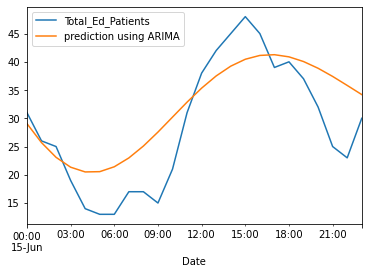

In [ ]:
test['Total_Ed_Patients'].plot(legend=True)
predictions.plot(legend=True)


In [ ]:
from statsmodels.tools.eval_measures import rmse

In [ ]:
rmse(test['Total_Ed_Patients'],predictions)

6.6506644453694

In [ ]:
test['Total_Ed_Patients'].mean()

28.583333333333332

In [ ]:
#test the performace with SARIMA
auto_arima(df['Total_Ed_Patients'],seasonal=True,trace=True,m=24).summary()   #M=24 HOURLY 

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[24] intercept   : AIC=inf, Time=2.52 sec
 ARIMA(0,0,0)(0,0,0)[24] intercept   : AIC=1463.259, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[24] intercept   : AIC=1061.791, Time=0.44 sec
 ARIMA(0,0,1)(0,0,1)[24] intercept   : AIC=1233.026, Time=0.43 sec
 ARIMA(0,0,0)(0,0,0)[24]             : AIC=1778.879, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[24] intercept   : AIC=1097.932, Time=0.03 sec
 ARIMA(1,0,0)(2,0,0)[24] intercept   : AIC=1060.472, Time=1.91 sec
 ARIMA(1,0,0)(2,0,1)[24] intercept   : AIC=inf, Time=5.84 sec
 ARIMA(1,0,0)(1,0,1)[24] intercept   : AIC=inf, Time=1.22 sec
 ARIMA(0,0,0)(2,0,0)[24] intercept   : AIC=inf, Time=3.69 sec
 ARIMA(2,0,0)(2,0,0)[24] intercept   : AIC=1050.134, Time=2.83 sec
 ARIMA(2,0,0)(1,0,0)[24] intercept   : AIC=1049.813, Time=0.72 sec
 ARIMA(2,0,0)(0,0,0)[24] intercept   : AIC=1054.315, Time=0.05 sec
 ARIMA(2,0,0)(1,0,1)[24] intercept   : AIC=inf, Time=1.50 sec
 ARIMA(2,0,0)(0,0,1)[24] intercept   : AIC=1

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  177
Model:             SARIMAX(5, 0, 1)x(1, 0, 1, 24)   Log Likelihood                -504.740
Date:                            Mon, 13 Sep 2021   AIC                           1029.479
Time:                                    12:34:57   BIC                           1061.240
Sample:                                         0   HQIC                          1042.360
                                            - 177                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      3.9651      1.794      2.210      0.027       0.449       7.482
ar.L1          1.7746      0.204      8.693      0.000       1.374       2.175
ar.L2         -0.8149      0.249     -3.269      0.001      -1.303      -0.326
ar.L3         -0.0547      0.208     -0.264      0.792      -0.462       0.352
ar.L4          0.0879      0.178      0.495      0.621      -0.260       0.436
ar.L5         -0.0682      0.099     -0.691      0.489      -0.262       0.125
ma.L1         -0.6967      0.191     -3.655      0.000      -1.070      -0.323
ar.S.L24      -0.5885      0.370     -1.592      0.111      -1.313       0.136
ma.S.L24       0.7776      0.368      2.113      0.035       0.056       1.499
sigma2        16.9151      1.667     10.146      0.000      13.647      20.183
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                34.29
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.02   Skew:                             0.12
Prob(H) (two-sided):                  0.94   Kurtosis:                         5.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
#(5,0,1)(1,0,1)[24]

model=SARIMAX(train['Total_Ed_Patients'],order=(5,0,1),seasonal_order=(1,0,1,24))

In [ ]:
results=model.fit()

C:\Users\Ntaoufi\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                  Total_Ed_Patients   No. Observations:                  153
Model:             SARIMAX(5, 0, 1)x(1, 0, 1, 24)   Log Likelihood                -453.189
Date:                            Mon, 13 Sep 2021   AIC                            924.377
Time:                                    12:35:37   BIC                            951.651
Sample:                                06-08-2018   HQIC                           935.456
                                     - 06-14-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4288      0.404      1.063      0.288      -0.362       1.220
ar.L2          0.7658      0.501      1.527      0.127      -0.217       1.748
ar.L3         -0.2027      0.117     -1.734      0.083      -0.432       0.026
ar.L4          0.0056      0.167      0.034      0.973      -0.321       0.333
ar.L5         -0.0615      0.107     -0.573      0.567      -0.272       0.149
ma.L1          0.7281      0.412      1.766      0.077      -0.080       1.536
ar.S.L24       0.9963      0.097     10.276      0.000       0.806       1.186
ma.S.L24      -0.9435      0.723     -1.305      0.192      -2.361       0.474
sigma2        18.2813     10.484      1.744      0.081      -2.267      38.829
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                20.81
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               0.98   Skew:                             0.13
Prob(H) (two-sided):                  0.94   Kurtosis:                         4.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
start=len(train)
end=len(train)+len(test)-1
predictions=results.predict(start,end,typ='levels').rename('SARIMA Predictions')

In [ ]:
test

,Hour,Total_Ed_Patients,Minute,day,month,year
Date,,,,,,
2018-06-15 00:00:00,0.0,31.0,0.0,15.0,6.0,2018.0
2018-06-15 01:00:00,1.0,26.0,0.0,15.0,6.0,2018.0
2018-06-15 02:00:00,2.0,25.0,0.0,15.0,6.0,2018.0
2018-06-15 03:00:00,3.0,19.0,0.0,15.0,6.0,2018.0
2018-06-15 04:00:00,4.0,14.0,0.0,15.0,6.0,2018.0
2018-06-15 05:00:00,5.0,13.0,0.0,15.0,6.0,2018.0
2018-06-15 06:00:00,6.0,13.0,0.0,15.0,6.0,2018.0
2018-06-15 07:00:00,7.0,17.0,0.0,15.0,6.0,2018.0
2018-06-15 08:00:00,8.0,17.0,0.0,15.0,6.0,2018.0


<AxesSubplot:xlabel='Date'>

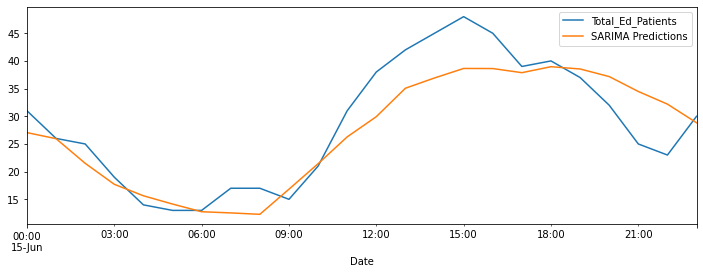

In [ ]:
test['Total_Ed_Patients'].plot(legend=True,figsize=(12,8))
predictions.plot(figsize=(12,4),legend=True)

In [ ]:
error=rmse(test['Total_Ed_Patients'],predictions)
error

5.063498555718719

In [ ]:
test['Total_Ed_Patients'].mean()

28.583333333333332

In [ ]:
#forecast into the unkown future(coming 4 hours )----- order=(5,0,1),seasonal_order=(1,0,1,24)
model=SARIMAX(df['Total_Ed_Patients'],order=(5,0,1),seasonal_order=(1,0,1,24))

In [ ]:
results=model.fit()

C:\Users\Ntaoufi\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
fcast=results.predict(len(df),len(df)+3,typ='levels').rename('SARIMA FORCAST')

<AxesSubplot:xlabel='Date'>

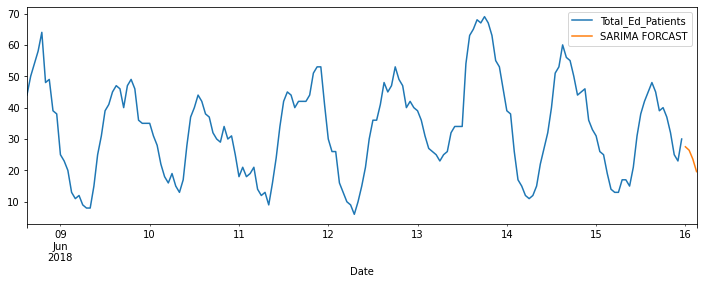

In [ ]:
df['Total_Ed_Patients'].plot(figsize=(12,4),legend=True)
fcast.plot(figsize=(12,4),legend=True)

In [ ]:
fcast

2018-06-16 00:00:00    27.524297
2018-06-16 01:00:00    26.442883
2018-06-16 02:00:00    23.595677
2018-06-16 03:00:00    19.609593
Freq: H, Name: SARIMA FORCAST, dtype: float64

In [ ]:
#the True Total_Ed_Patients in the database
#2018-06-16 00:00:00	0.0	26.0	0.0	16.0	6.0	2018.0
#2018-06-16 01:00:00	1.0	20.0	0.0	16.0	6.0	2018.0
#2018-06-16 02:00:00	2.0	16.0	0.0	16.0	6.0	2018.0
#2018-06-16 03:00:00	3.0	17.0	0.0	16.0	6.0	2018.0

